In [13]:
import numpy as np
from scipy.linalg import norm
from ase.build import molecule
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.units import fs, kB
from ase.io.trajectory import Trajectory
from fireballpy import Fireball

# Define our atoms
atoms = molecule('CH4')

# Assign Fireball calculator
atoms.calc = Fireball(fdata='biology')

# Set momenta so that T = 300K initially
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# Define the integrator
dyn = VelocityVerlet(atoms, trajectory='dinamic.traj', logfile='dinamic.log', timestep=0.2*fs)

# Variables of our simulation
nsteps = 1000
nsave = 100

# Function to print us the status of the simulation
def printenergies(a=atoms):
    ep = a.get_potential_energy() / len(a)
    ek = a.get_kinetic_energy() / len(a)
    et = ep + ek
    t = ek / (1.5 * kB)
    print(f'Energy per atom: Epot = {ep:.3f}eV  Ekin = {ek:.3f}eV (T={t:.3f}K)  Etot = {et:.3f}')

# Run simulation and execute a function each nsave steps
dyn.attach(printenergies, interval=nsave)
dyn.run(nsteps)

Energy per atom: Epot = -41.713eV  Ekin = 0.036eV (T=280.846K)  Etot = -41.677
Energy per atom: Epot = -43.350eV  Ekin = 0.038eV (T=291.599K)  Etot = -43.312
Energy per atom: Epot = -43.341eV  Ekin = 0.030eV (T=229.250K)  Etot = -43.311
Energy per atom: Epot = -43.325eV  Ekin = 0.028eV (T=214.924K)  Etot = -43.297
Energy per atom: Epot = -43.317eV  Ekin = 0.036eV (T=278.544K)  Etot = -43.281
Energy per atom: Epot = -43.306eV  Ekin = 0.028eV (T=220.013K)  Etot = -43.278
Energy per atom: Epot = -43.318eV  Ekin = 0.030eV (T=232.736K)  Etot = -43.288
Energy per atom: Epot = -43.356eV  Ekin = 0.054eV (T=414.688K)  Etot = -43.303
Energy per atom: Epot = -43.352eV  Ekin = 0.048eV (T=373.581K)  Etot = -43.304
Energy per atom: Epot = -43.305eV  Ekin = 0.029eV (T=221.811K)  Etot = -43.276
Energy per atom: Epot = -43.301eV  Ekin = 0.068eV (T=524.334K)  Etot = -43.233


True

In [17]:
# Load the trajectory
traj = Trajectory('dinamic.traj')

# Allocate arrays to save
time = np.zeros(nsave + 1)
epot = np.zeros(nsave + 1)
ekin = np.zeros(nsave + 1)
forc = np.zeros(nsave + 1)
distances = np.zeros((nsave + 1, 4))

# Fill them
for i, frame in enumerate(traj[::nsteps//nsave]):
    time[i] = i*0.2*fs
    epot[i] = frame.get_potential_energy()
    ekin[i] = frame.get_kinetic_energy()
    forc[i] = norm(frame.get_forces(), axis=1).mean()
    pos = frame.get_positions()
    distances[i, :] = norm((pos[1:, :] - pos[0, :]), axis=1)

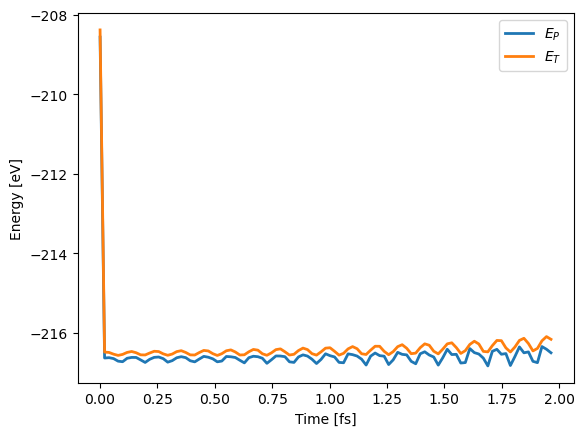

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(time, epot, lw=2, label='$E_P$')
# ax.plot(time, ekin, lw=2, label='$E_K$')
ax.plot(time, epot + ekin, lw=2, label='$E_T$')
ax.set_xlabel('Time [fs]')
ax.set_ylabel('Energy [eV]')
ax.legend()

Text(0, 0.5, '$\\langle |F| \\rangle$ [eV/$\\AA$]')

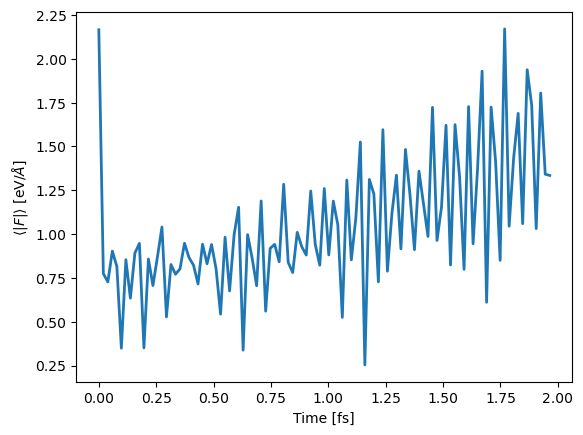

In [19]:
fig, ax = plt.subplots()
ax.plot(time, forc, lw=2)
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$\langle |F| \rangle$ [eV/$\AA$]')

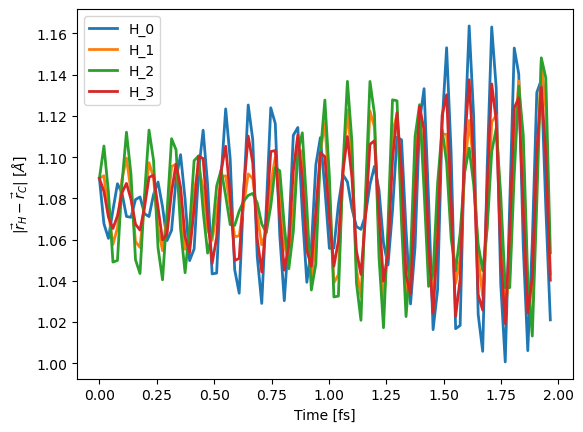

In [20]:
fig, ax = plt.subplots()
for i in range(distances.shape[1]):
    ax.plot(time, distances[:, i], lw=2, label=f"H_{i}")
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$|\vec{r}_H - \vec{r}_C|$ [$\AA$]')
ax.legend()

In [21]:
traj[0].get_forces(), traj[0].get_positions()

(array([[-1.12007597e-15, -1.02156885e-14, -4.38352491e-07],
        [-1.56317853e+00, -1.56317853e+00, -1.56317853e+00],
        [ 1.56317853e+00,  1.56317853e+00, -1.56317853e+00],
        [-1.56317875e+00,  1.56317875e+00,  1.56317875e+00],
        [ 1.56317875e+00, -1.56317875e+00,  1.56317875e+00]]),
 array([[ 0.      ,  0.      ,  0.      ],
        [ 0.629118,  0.629118,  0.629118],
        [-0.629118, -0.629118,  0.629118],
        [ 0.629118, -0.629118, -0.629118],
        [-0.629118,  0.629118, -0.629118]]))

In [22]:
traj[1].get_forces(), traj[1].get_positions()

(array([[ 0.06538705, -0.12711827, -0.07322884],
        [-0.24931031, -0.22239915, -0.23649788],
        [ 0.2765084 ,  0.30933881, -0.3301918 ],
        [-0.34119059,  0.33304475,  0.33802718],
        [ 0.24860545, -0.29286615,  0.30189134]]),
 array([[-0.00177353,  0.0011539 ,  0.00120409],
        [ 0.62860916,  0.62535831,  0.6304458 ],
        [-0.62965305, -0.62978973,  0.63169332],
        [ 0.63106834, -0.62729319, -0.63000998],
        [-0.62570086,  0.63380432, -0.62946717]]))

In [23]:
from ase.visualize import view
view(traj[0], viewer='x3d')

In [24]:
view(traj[-1], viewer='x3d')